11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 227ms/step - loss: 0.2224 - val_loss: 0.0789
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 216ms/step - loss: 0.0783 - val_loss: 0.0743
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 214ms/step - loss: 0.0744 - val_loss: 0.0725
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 215ms/step - loss: 0.0728 - val_loss: 0.0713
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 212ms/step - loss: 0.0717 - val_loss: 0.0704
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 215ms/step - loss: 0.0709 - val_loss: 0.0702
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - loss: 0.0702 - val_loss: 0.0692
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 216ms/step - loss: 0.0695 - val_loss: 0.0687
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 212ms/step - loss: 0.0691 - val_loss: 0.0683
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 211ms/step - loss: 0.0688 - val_loss: 0.0680
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


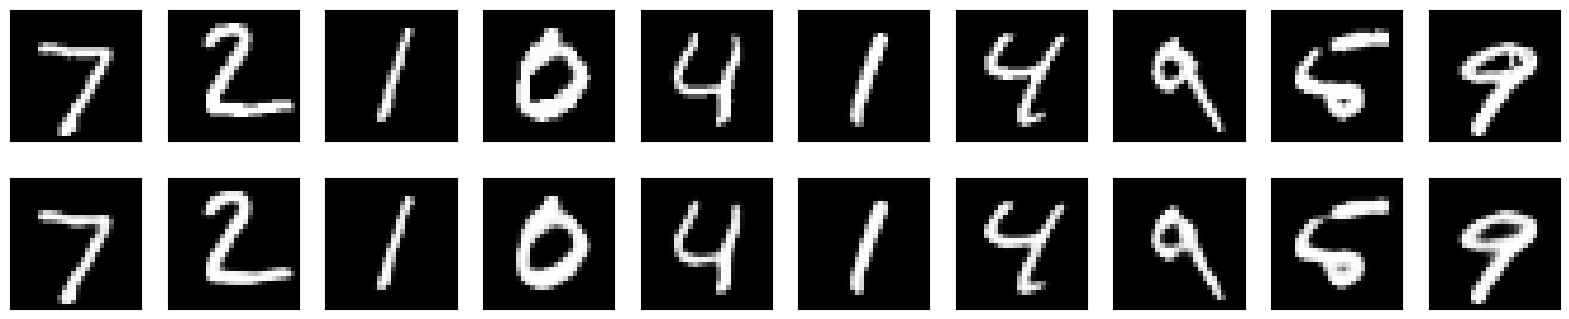

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizes pixel values to [0, 1] for training stability.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# x_train.shape = (60000, 28, 28). We are reshaping into (60000, 28, 28, 1) to add channel
# initial x is greysclae, to make it RBG we add channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Define the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))

# Encoding layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoding layer
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

# padding='same' --> zero padding
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# Build the autoencoder model
autoencoder = models.Model(input_img, decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)

# Display the results
n = 10 # Display the first 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
# Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray') # for 2d images with colormap grey
  plt.gray()
  ax.get_xaxis().set_visible(False) # ser_visible hides the axis ticks
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()